In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [16]:
image_path = "../output_images/player_1.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

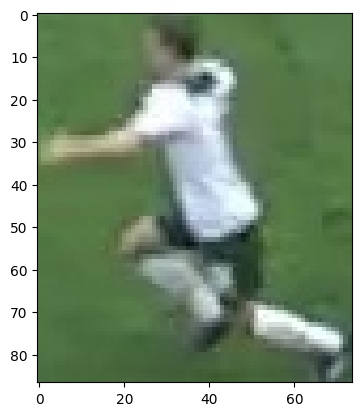

In [17]:
plt.imshow(image)
plt.show()

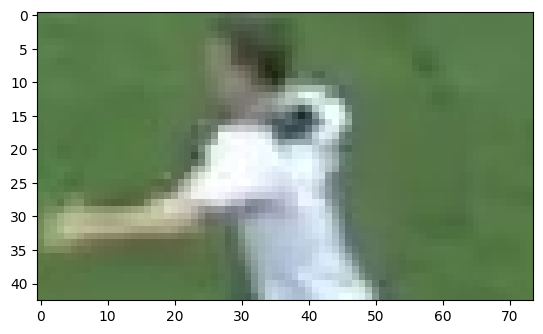

In [18]:
# take top half of the image
top_half_image = image[0: int(image.shape[0] / 2), :]
plt.imshow(top_half_image)
plt.show()

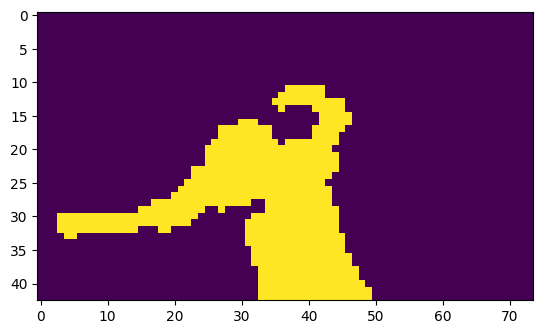

In [19]:
# cluster the image (background and shirt)
# reshape the image into a 2D-array
image_2d = top_half_image.reshape(-1, 3)

# perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=73).fit(image_2d)

# get the labels
labels = kmeans.labels_

# reshape labels into the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# display clustered image
plt.imshow(clustered_image)
plt.show()

In [20]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print("Non player cluster: ", non_player_cluster)

Non player cluster:  0


In [22]:
player_cluster = 1 - non_player_cluster
print("Player cluster: ", player_cluster)

Player cluster:  1


In [23]:
kmeans.cluster_centers_[player_cluster]

array([198.13153153, 209.41621622, 211.21621622])